In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [3]:
train_set = pd.read_csv("emnist-letters-train.csv")
test_set = pd.read_csv("emnist-letters-test.csv")

In [4]:
train_set.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88799 entries, 0 to 88798
Columns: 785 entries, 23 to 0.415
dtypes: int64(785)
memory usage: 531.8 MB


In [6]:
print(f"Train set shape:  {train_set.shape}")
print(f"Test set shape:  {test_set.shape}")

Train set shape:  (88799, 785)
Test set shape:  (14799, 785)


<Axes: ylabel='count'>

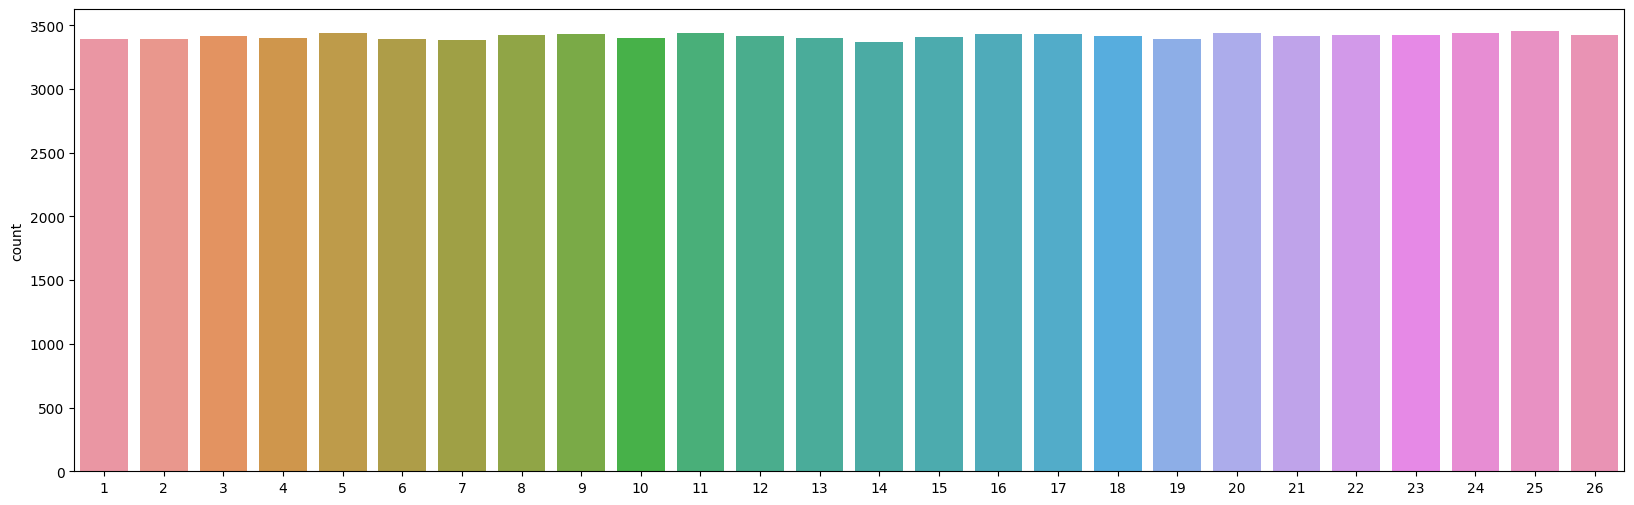

In [7]:
labels = train_set["23"].values
plt.figure(figsize=(20,6))
sns.countplot(x=labels)


In [8]:
y_train = np.array(train_set.iloc[:,0].values)
x_train = np.array(train_set.iloc[:,1:].values)
#test_set
y_test = np.array(test_set.iloc[:,0].values)
x_test = np.array(test_set.iloc[:,1:].values)
print(y_train.shape)
print(x_train.shape)

(88799,)
(88799, 784)


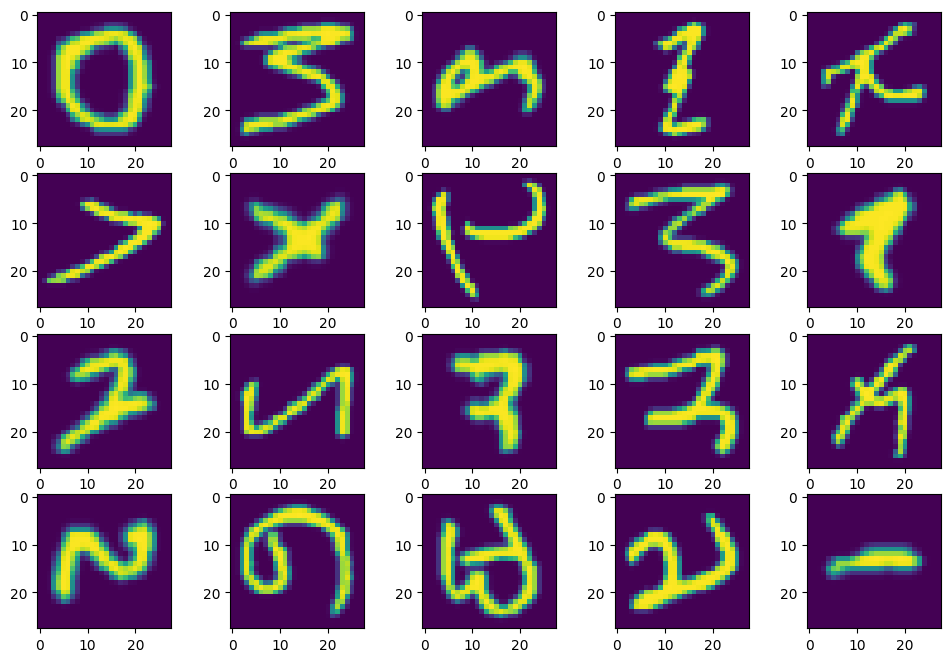

In [9]:
fig, axes = plt.subplots(4, 5,figsize=(12,8))

for i, j in enumerate(axes.flat):
    j.imshow(x_train[i+2].reshape([28,28]))

In [10]:
# Normalize pixel values to the range [0, 1] by dividing by 255.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to have a single color channel (since EMNIST is grayscale)
# and match the input shape expected by the model
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# One-hot encode the target labels for categorical classification.
y_train = tf.keras.utils.to_categorical(y_train, 37)  # 37 classes (26 letters + 1 for 'none')
y_test = tf.keras.utils.to_categorical(y_test, 37)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train ,test_size=0.2,random_state = 42)

# **CNN**

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(37,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 512)         295424    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 512)         0

In [13]:
model.compile(optimizer="Adam",
             loss="categorical_crossentropy",
             metrics=(["accuracy"]))

In [16]:
epochs = 5
batch_size = 100

In [17]:
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test),
                   verbose=1)

Epoch 1/5
711/711 [==============================] - 175s 246ms/step - loss: 0.1706 - accuracy: 0.9394 - val_loss: 0.1935 - val_accuracy: 0.9355
Epoch 2/5
711/711 [==============================] - 175s 246ms/step - loss: 0.1493 - accuracy: 0.9461 - val_loss: 0.1918 - val_accuracy: 0.9352
Epoch 3/5
711/711 [==============================] - 176s 248ms/step - loss: 0.1335 - accuracy: 0.9509 - val_loss: 0.1870 - val_accuracy: 0.9363
Epoch 4/5
711/711 [==============================] - 174s 244ms/step - loss: 0.1211 - accuracy: 0.9529 - val_loss: 0.2050 - val_accuracy: 0.9295
Epoch 5/5
711/711 [==============================] - 174s 245ms/step - loss: 0.1097 - accuracy: 0.9574 - val_loss: 0.2184 - val_accuracy: 0.9279


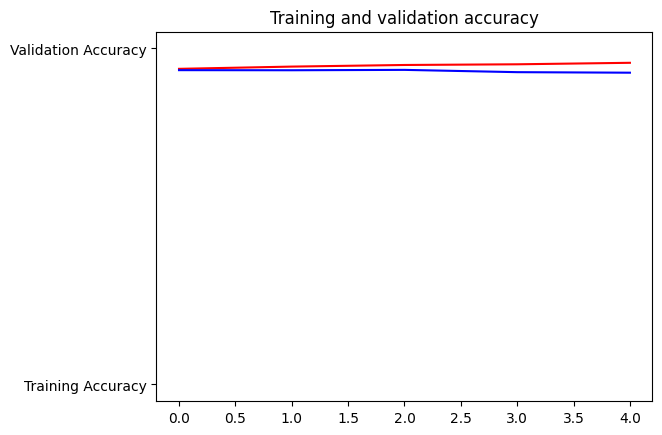

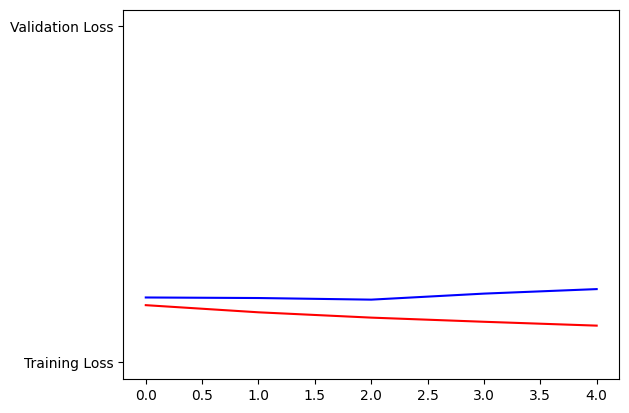

In [18]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()